# <h1 align = 'center'> **Gender Classification from an image** </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Technical Assignment/

/content/drive/My Drive/Technical Assignment


# **Objective** 

 Setting a neural network model that achieves the highest accuracy rate for the classification of male and female images.

In [ ]:
import os
import random
import shutil, sys  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
%matplotlib inline
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from statistics import mean
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.preprocessing.image import img_to_array,load_img
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

**About Dataset**

The dataset for training the model contains 2500 images of male and female.

The dataset contains two folders namely Training and Testing. 

The dataset of Training will be used for both  Training and validating purposes.

The dataset of Testing will be used for testing purposes.

In [ ]:
rootdir= '/content/drive/My Drive/[ArabyAds] Technical Assignment/Training'

In [ ]:
classes = os.listdir(rootdir+'/data/train' )
print(classes)

['Male', 'Female']


In [ ]:
# Construct a train and validation  set from Training set
# for i in classes:

 # os.makedirs(rootdir +'/data/train/' + i)

 # os.makedirs(rootdir +'/data/validation/' + i)

 #  source = rootdir + '/' + i

 # allFileNames = os.listdir(source)

 # np.random.shuffle(allFileNames)

 # test_ratio = 0.25

 # train_FileNames, validation_FileNames = np.split(np.array(allFileNames),
  #                                                     [int(len(allFileNames)* (1 - test_ratio))])

 # train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
 # validation_FileNames = [source+'/' + name for name in validation_FileNames.tolist()]

 # for name in train_FileNames:
  #  shutil.copy(name, rootdir +'/data/train/' + i)

 # for name in validation_FileNames:
  #  shutil.copy(name, rootdir +'/data/validation/' + i)

In [ ]:
male_files_train = os.listdir(rootdir  + "/data/train/Male")
print('No. of training examples of male:', len(male_files_train))
Female_files_train = os.listdir(rootdir  + "/data/train/Female")
print('No. of training examples of Female:', len(Female_files_train))
male_files_validation = os.listdir(rootdir  + "/data/validation/Male")
print('No. of validation examples of male:', len(male_files_validation))
Female_files_validation = os.listdir(rootdir  + "/data/validation/Female")
print('No. of validation examples of Female:', len(Female_files_validation))

No. of training examples of male: 750
No. of training examples of Female: 750
No. of validation examples of male: 250
No. of validation examples of Female: 250


In [ ]:
def show_image(dir):
    plt.figure(figsize=(12,7))
    for i in range(5):
        plt.subplot(2,5,i+1)
        img = random.choice(os.listdir(dir))
        img = load_img(os.path.join(dir,img))
        plt.subplots_adjust(hspace=0.2)
        x =dir.split("/")[-1]
        if x == "Male":
            plt.suptitle("Male Images",fontsize=15)
        else:
            plt.suptitle("Female Images",fontsize=15)
        plt.imshow(img)
    plt.tight_layout()

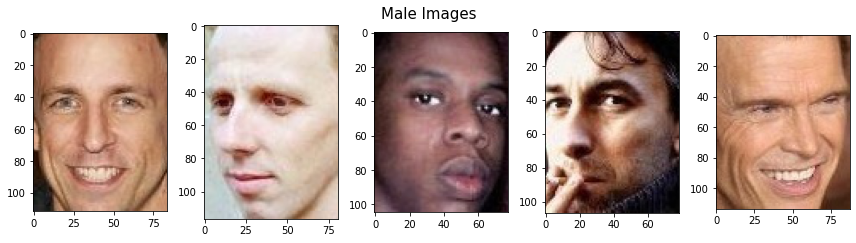

In [ ]:
show_image("/content/drive/My Drive/[ArabyAds] Technical Assignment/Training/data/train/Male")

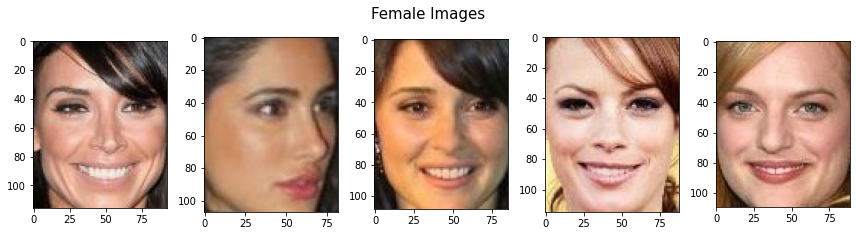

In [ ]:
show_image("/content/drive/My Drive/[ArabyAds] Technical Assignment/data/train/Female")

# Data Preprocessing 

Image augmentation is a technique of preprocessing image data.  It involves applying transformations (rotation, cropping, shearing, zooming etc.) on our existing images and adding these images to our database.



These transformed images are completely new to our model and help us in 2 two ways:

*   Increases the size of our dataset
*   Makes our model more robust and capable of handling ‘true-to-life’ images, which are not ‘perfect’





**ImageDataGenerator**

ImageDataGenerator is a powerful tool that can be used for image augmentation and feeding these images into our model.


The augmentation takes place in memory, and the generators make it very easy to setup training and Validation data, without the need of manual labeling of the images

In [ ]:
train_datagen = ImageDataGenerator( # Data Augumentation for train data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_gen=train_datagen.flow_from_directory('/content/drive/My Drive/[ArabyAds] Technical Assignment/Training/data/train',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

Found 1500 images belonging to 2 classes.


In [ ]:
valid_gen=test_datagen.flow_from_directory('/content/drive/My Drive/[ArabyAds] Technical Assignment/Training/data/validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 500 images belonging to 2 classes.


# Model CNN 

In our proposed Project, we will use a CNN (Convolutional Neural Network) architecture. CNN which is a deep learning algorithm is capable of distinguishing images from their characteristics..

CNN is generally used for image analysis, image segmentation, image classification, medical image analysis, image and video recognition.

Now we will try to implement our model using different optimizers in order to select the best one with the highest accuracy

**Train**





**Optimizer='RMSProp'**

Let's build the model now.

In [ ]:
kernel_s=(3,3) # The size of kernel

In [ ]:
model_RMS=models.Sequential()
model_RMS.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model_RMS.add(layers.MaxPooling2D((2,2)))

model_RMS.add(layers.Conv2D(64,kernel_s,activation='relu'))
model_RMS.add(layers.MaxPooling2D((2,2)))
model_RMS.add(layers.Conv2D(64,kernel_s,activation='relu'))
model_RMS.add(layers.MaxPooling2D((2,2)))

model_RMS.add(layers.Conv2D(128,kernel_s,activation='relu'))
model_RMS.add(layers.MaxPooling2D((2,2)))
model_RMS.add(layers.Conv2D(128,kernel_s,activation='relu'))
model_RMS.add(layers.MaxPooling2D((2,2)))

model_RMS.add(layers.Flatten())
model_RMS.add(layers.Dense(256,activation='relu'))
model_RMS.add(layers.Dense(1,activation='sigmoid'))
model_RMS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 29, 29, 64)      

In [ ]:
model_RMS.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


Model Training


In [ ]:
history_RMS=model_RMS.fit(train_gen,epochs=50,
                  validation_data=valid_gen)

Epoch 1/50
32/32 [==============================] - 24s 697ms/step - loss: 0.7108 - acc: 0.5153 - val_loss: 0.9272 - val_acc: 0.5000
Epoch 2/50
32/32 [==============================] - 23s 719ms/step - loss: 0.7255 - acc: 0.5433 - val_loss: 0.7633 - val_acc: 0.5040
Epoch 3/50
32/32 [==============================] - 23s 706ms/step - loss: 0.6862 - acc: 0.5773 - val_loss: 0.6697 - val_acc: 0.6000
Epoch 4/50
32/32 [==============================] - 24s 742ms/step - loss: 0.6678 - acc: 0.6427 - val_loss: 0.6381 - val_acc: 0.6520
Epoch 5/50
32/32 [==============================] - 22s 699ms/step - loss: 0.5948 - acc: 0.7013 - val_loss: 0.5442 - val_acc: 0.7460
Epoch 6/50
32/32 [==============================] - 22s 695ms/step - loss: 0.5626 - acc: 0.7227 - val_loss: 0.4801 - val_acc: 0.7900
Epoch 7/50
32/32 [==============================] - 23s 702ms/step - loss: 0.5269 - acc: 0.7513 - val_loss: 0.5192 - val_acc: 0.7580
Epoch 8/50
32/32 [==============================] - 24s 743ms/step - 

Summarizng the training history :


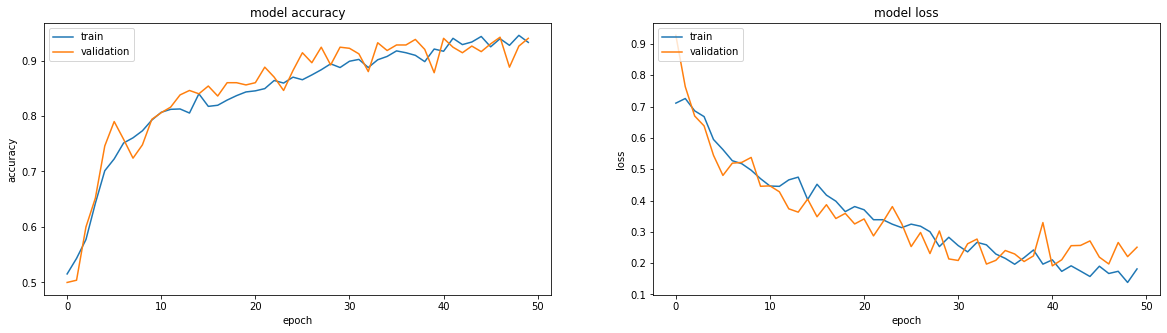

In [ ]:
fig = plt.figure(figsize=(20,5))
# summarize history for accuracy
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history_RMS.history['acc'])
ax1.plot(history_RMS.history['val_acc'])
ax1.set(title='model accuracy', ylabel='accuracy', xlabel='epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history_RMS.history['loss'])
ax2.plot(history_RMS.history['val_loss'])
ax2.set(title='model loss', ylabel='loss', xlabel='epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

**Validation**

The average accuracy for the training data :


In [ ]:

print('Average training score :', round(mean(history_RMS.history['acc']), 2))

Average training score : 0.84


Let's evaluate on the testing set :

In [ ]:
score = model_RMS.evaluate(valid_gen, verbose = 0)
print('Validation accuracy:', round(score[1], 2))

Validation accuracy: 0.94


**Test**

To feed a test image into the model, we need to preprocess it first


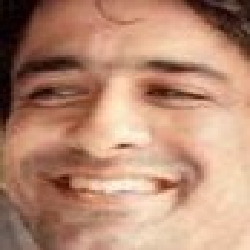

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/064290.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model_RMS.predict(images, batch_size=10)
img

The result of the prediction is inferred as follows:

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")
    

Male


**But how do we know the classes?**


ImageDataGenerator assigns numbers to classes based on the Alphabetic order of the class names. Since ‘Female’ comes before ‘Male’ lexicographically, it is assigned the class number 0 and ‘Male’ is assigned the class number 1.

Another example

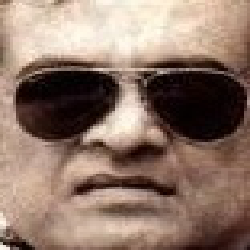

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/064541.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model_RMS.predict(images, batch_size=10)
img

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")
    

Male


After the model is done training, it is very important to save the model, so that it can be reused

In [ ]:
model_RMS.save("CNN_rmsp.h5")
print("Saved model to disk")

Saved model to disk



**Optimizer='SGD'**

**Train**

we will use the same model with the same hyperparameter, and different optimizer

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


In [ ]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model Training


In [ ]:
history_SGD=model.fit(train_gen,epochs=50,
                  validation_data=valid_gen)

Epoch 1/50
32/32 [==============================] - 36s 740ms/step - loss: 0.7002 - acc: 0.5000 - val_loss: 0.6984 - val_acc: 0.5000
Epoch 2/50
32/32 [==============================] - 26s 800ms/step - loss: 0.6981 - acc: 0.5127 - val_loss: 0.6974 - val_acc: 0.5860
Epoch 3/50
32/32 [==============================] - 30s 952ms/step - loss: 0.6971 - acc: 0.5967 - val_loss: 0.6964 - val_acc: 0.6040
Epoch 4/50
32/32 [==============================] - 23s 717ms/step - loss: 0.6967 - acc: 0.5660 - val_loss: 0.6961 - val_acc: 0.5160
Epoch 5/50
32/32 [==============================] - 27s 857ms/step - loss: 0.6962 - acc: 0.5800 - val_loss: 0.6952 - val_acc: 0.5480
Epoch 6/50
32/32 [==============================] - 27s 830ms/step - loss: 0.6952 - acc: 0.5460 - val_loss: 0.6944 - val_acc: 0.6060
Epoch 7/50
32/32 [==============================] - 24s 744ms/step - loss: 0.6943 - acc: 0.5827 - val_loss: 0.6946 - val_acc: 0.5280
Epoch 8/50
32/32 [==============================] - 23s 710ms/step - 

Summarizng the training history :

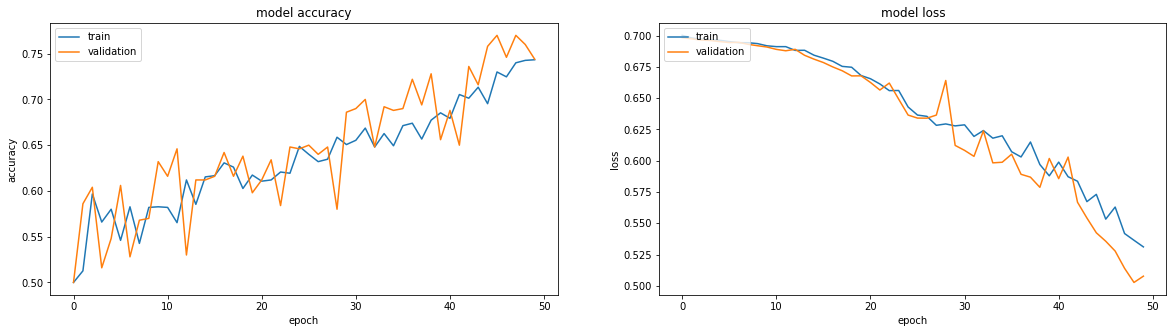

In [ ]:
fig = plt.figure(figsize=(20,5))
# summarize history for accuracy
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history_SGD.history['acc'])
ax1.plot(history_SGD.history['val_acc'])
ax1.set(title='model accuracy', ylabel='accuracy', xlabel='epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history_SGD.history['loss'])
ax2.plot(history_SGD.history['val_loss'])
ax2.set(title='model loss', ylabel='loss', xlabel='epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

**Validation**



The average accuracy for the training data :



In [ ]:

print('Average training score :', round(mean(history_SGD.history['acc']), 2))

Average training score : 0.64


Let's evaluate on the testing set :

In [ ]:
score = model.evaluate(valid_gen, verbose = 0)
print('Validation accuracy:', round(score[1], 2))

Validation accuracy: 0.74


**Test**

To feed a test image into the model, we need to preprocess it first


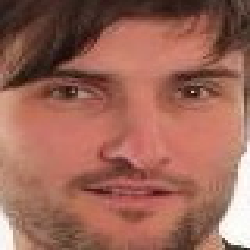

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/063478.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
img

The result of the prediction is inferred as follows:

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Male


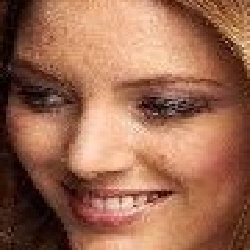

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/113024.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
img

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Female


In [ ]:
model.save("CNN_SGD.h5")
print("Saved model to disk")

Saved model to disk


**Optimizer='Adam'**

**Train**

In [ ]:
modelA=models.Sequential()
modelA.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
modelA.add(layers.MaxPooling2D((2,2)))

modelA.add(layers.Conv2D(64,kernel_s,activation='relu'))
modelA.add(layers.MaxPooling2D((2,2)))
modelA.add(layers.Conv2D(64,kernel_s,activation='relu'))
modelA.add(layers.MaxPooling2D((2,2)))

modelA.add(layers.Conv2D(128,kernel_s,activation='relu'))
modelA.add(layers.MaxPooling2D((2,2)))
modelA.add(layers.Conv2D(128,kernel_s,activation='relu'))
modelA.add(layers.MaxPooling2D((2,2)))

modelA.add(layers.Flatten())
modelA.add(layers.Dense(256,activation='relu'))
modelA.add(layers.Dense(1,activation='sigmoid'))
modelA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)      

In [ ]:
modelA.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])


Model Training

In [ ]:
history_Adam=modelA.fit(train_gen,epochs=50,
                  validation_data=valid_gen)

Epoch 1/50
32/32 [==============================] - 26s 789ms/step - loss: 0.7003 - acc: 0.5180 - val_loss: 0.6884 - val_acc: 0.6320
Epoch 2/50
32/32 [==============================] - 26s 798ms/step - loss: 0.6784 - acc: 0.6127 - val_loss: 0.5842 - val_acc: 0.6900
Epoch 3/50
32/32 [==============================] - 24s 761ms/step - loss: 0.6073 - acc: 0.6653 - val_loss: 0.5845 - val_acc: 0.7040
Epoch 4/50
32/32 [==============================] - 24s 742ms/step - loss: 0.5275 - acc: 0.7467 - val_loss: 0.5233 - val_acc: 0.7500
Epoch 5/50
32/32 [==============================] - 23s 702ms/step - loss: 0.5086 - acc: 0.7647 - val_loss: 0.4576 - val_acc: 0.7760
Epoch 6/50
32/32 [==============================] - 23s 705ms/step - loss: 0.4773 - acc: 0.7907 - val_loss: 0.4371 - val_acc: 0.8180
Epoch 7/50
32/32 [==============================] - 23s 702ms/step - loss: 0.4571 - acc: 0.7913 - val_loss: 0.4377 - val_acc: 0.8240
Epoch 8/50
32/32 [==============================] - 24s 740ms/step - 

Summarizng the training history :

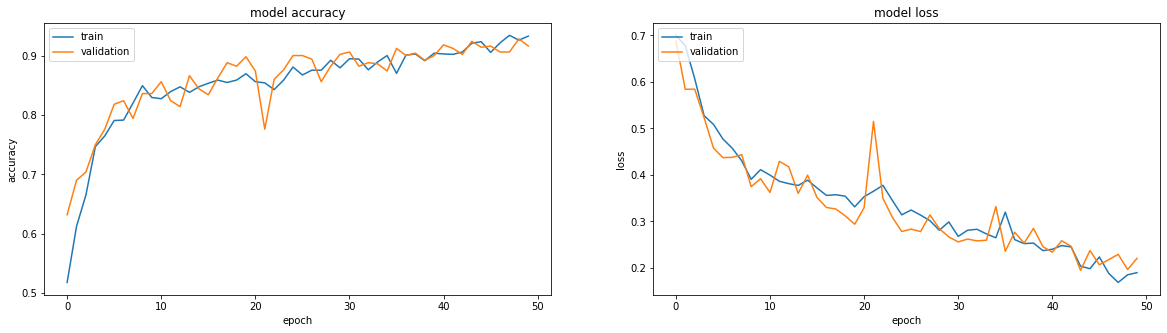

In [ ]:
fig = plt.figure(figsize=(20,5))
# summarize history for accuracy
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history_Adam.history['acc'])
ax1.plot(history_Adam.history['val_acc'])
ax1.set(title='model accuracy', ylabel='accuracy', xlabel='epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history_Adam.history['loss'])
ax2.plot(history_Adam.history['val_loss'])
ax2.set(title='model loss', ylabel='loss', xlabel='epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

**Validation**



The average accuracy for the training data :



In [ ]:

print('Average training score :', round(mean(history_Adam.history['acc']), 2))

Average training score : 0.85


Let's evaluate on the testing set :

In [ ]:
score = modelA.evaluate(valid_gen, verbose = 0)
print('Validation accuracy:', round(score[1], 2))

Validation accuracy: 0.92


**Test**

To feed a test image into the model, we need to preprocess it first


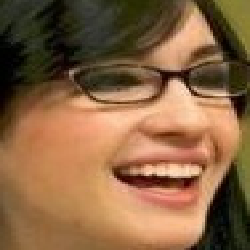

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/113037.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = modelA.predict(images, batch_size=10)
img

The result of the prediction is inferred as follows:

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Female


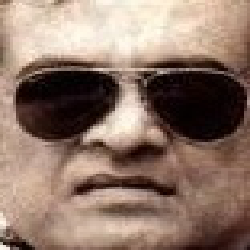

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/064541.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = modelA.predict(images, batch_size=10)
img

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Female


In [ ]:
modelA.save("CNN_Adam.h5")
print("Saved model to disk")

Saved model to disk


We have implemented our model using different optimizers so
that best accuracy can be obtained. 

We have achieved satisfactory accuracy using **Adam**, and **RMSprop** optimizer which is above 90%. Using **SGD**  optimizer the accuracy gained less compared with the others. Among all of these, the best accuracy has been gained using the RMSprop optimizer.
The **RMSprop** optimizer shows the best accuracy and also it maintains a good balance between training and validation accuracy.

Even though our model has a good accuracy it still fails to predict a specific condition like the last case, we have to try a new model more accurate, let's try something much deeper.

**Transfer Learning**

Transfer learning is a popular technique, especially while using CNNs for computer vision tasks.

In transfer learning, we take a big model that has already been trained for days (even weeks) on a huge dataset, use the pre-trained model as a feature extractor , which can be useful if the dataset is small, and/or pre-trained model solves a problem very similar to the one you want to solve.





**Train**

In [ ]:

vgg_model = VGG16(include_top=False, input_shape=(250, 250, 3))

for layer in vgg_model.layers:
    layer.trainable=False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)
mmodel = Model(inputs = vgg_model.inputs, outputs = output)


In [ ]:

mmodel.summary()
mmodel.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

Model Training

In [ ]:
history = mmodel.fit(train_gen,
                    validation_data = valid_gen,
                    epochs=50, verbose=1)

Epoch 1/50
32/32 [==============================] - 28s 864ms/step - loss: 3.6817 - accuracy: 0.5460 - val_loss: 0.6985 - val_accuracy: 0.7780
Epoch 2/50
32/32 [==============================] - 27s 841ms/step - loss: 1.4375 - accuracy: 0.6420 - val_loss: 0.7862 - val_accuracy: 0.7420
Epoch 3/50
32/32 [==============================] - 27s 842ms/step - loss: 1.2595 - accuracy: 0.6867 - val_loss: 0.5868 - val_accuracy: 0.8400
Epoch 4/50
32/32 [==============================] - 27s 840ms/step - loss: 1.0858 - accuracy: 0.7053 - val_loss: 0.5000 - val_accuracy: 0.8380
Epoch 5/50
32/32 [==============================] - 28s 875ms/step - loss: 0.8887 - accuracy: 0.7620 - val_loss: 0.6319 - val_accuracy: 0.8320
Epoch 6/50
32/32 [==============================] - 27s 841ms/step - loss: 0.7713 - accuracy: 0.7640 - val_loss: 0.3636 - val_accuracy: 0.8520
Epoch 7/50
32/32 [==============================] - 27s 842ms/step - loss: 0.6020 - accuracy: 0.7967 - val_loss: 0.3175 - val_accuracy: 0.8680

Summarizng the training history :

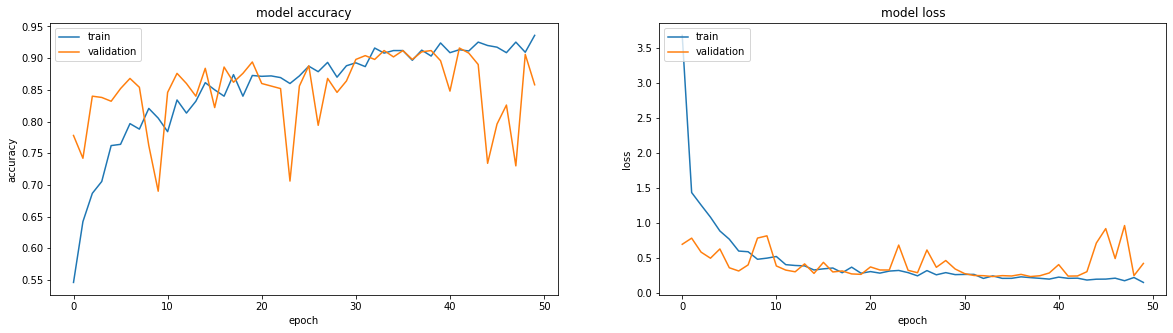

In [ ]:


fig = plt.figure(figsize=(20,5))
# summarize history for accuracy
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set(title='model accuracy', ylabel='accuracy', xlabel='epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set(title='model loss', ylabel='loss', xlabel='epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()


**Validation**



The average accuracy for the training data :



In [ ]:

print('Average training score :', round(mean(history.history['accuracy']), 2))

Average training score : 0.85


Let's evaluate on the testing set :

In [ ]:
score = mmodel.evaluate(valid_gen, verbose = 0)
print('Validation accuracy:', round(score[1], 2))

Validation accuracy: 0.86


Great! The Average training score has increased to 85%, although it was a slight improvement, but we ensure that our model performance is consistent (the training score and the validation score are similar)

**Test**



To feed a test image into the model, we need to preprocess it first


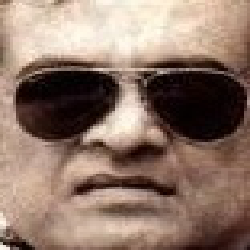

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/064541.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = mmodel.predict(images, batch_size=10)
img

The result of the prediction is inferred as follows:

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Male


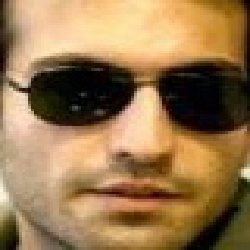

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/063825.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = mmodel.predict(images, batch_size=10)
img

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Male


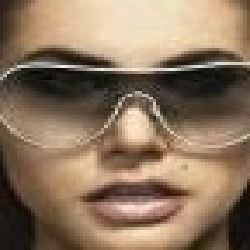

In [ ]:
path = '/content/drive/My Drive/[ArabyAds] Technical Assignment/Testing/Testing/113197.jpg.jpg' 
img = image.load_img(path, target_size=(250,250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = mmodel.predict(images, batch_size=10)
img

In [ ]:
if classes[0][0] == 0:
    print("Female")
else:
    print("Male")

Female


Here, we can see that our model correctly classify Gender.

In [ ]:
mmodel.save("VGG.h5")
print("Saved model to disk")

Saved model to disk



# <h1 align = 'center'> **Thank you.** </h1>
